In [28]:
import pandas as pd

df = pd.read_csv('realtor-data_2.csv')
df = df.dropna(subset=['city', 'zip_code'])
df.isnull().sum()


status                0
bed               24851
bath              24805
acre_lot          13980
city                  0
state                 0
zip_code              0
house_size        24839
prev_sold_date    71059
price                 0
dtype: int64

In [29]:
df.dropna(inplace = True)

In [30]:
df.isnull().sum()

status            0
bed               0
bath              0
acre_lot          0
city              0
state             0
zip_code          0
house_size        0
prev_sold_date    0
price             0
dtype: int64

In [31]:
df.duplicated().sum()

19248

/var/folders/lm/s629c1qj5kvcyxqfyk07780w0000gn/T/ipykernel_26153/83526081.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-muted')


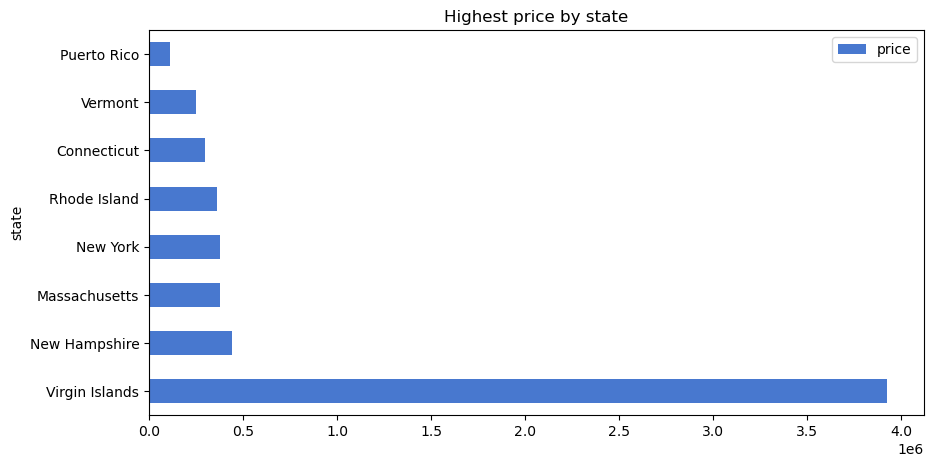

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors

plt.style.use('seaborn-muted')
order = df.groupby('state').agg({'price':'median'}).sort_values(by='price',ascending = False).plot(kind = 'barh',
                             figsize=(10,5),title = 'Highest price by state')

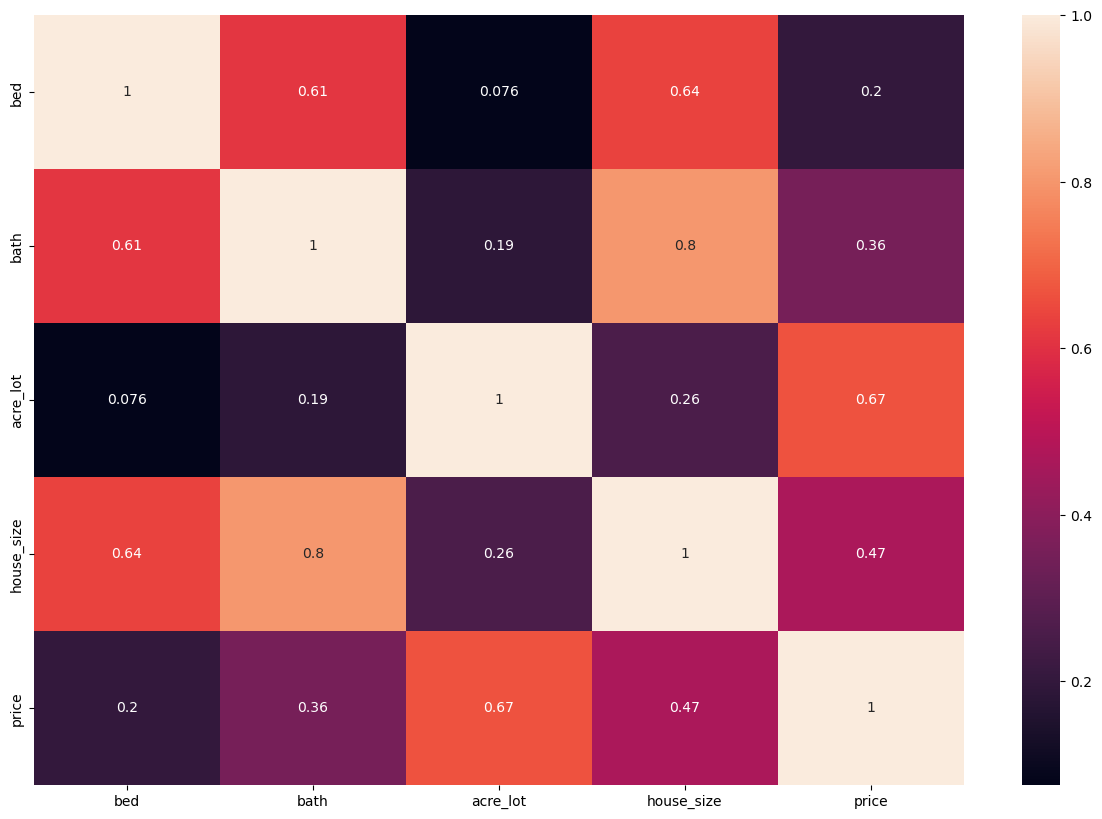

In [33]:
# Correlation matrix
corr = df.loc[:,['bed','bath','acre_lot','house_size','price']]
plt.figure(figsize=(15,10))
sns.heatmap(data =  corr.corr(),annot = True);

## Method 1

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [45]:
X = df[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'city', 'state']]
y = df['price']
X = pd.get_dummies(X, columns=['city', 'state', 'zip_code'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Create the decision tree model
model_DT = DecisionTreeRegressor(max_depth=5)
# Fit the model to the training data
model_DT.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model_DT.predict(X_test)
# Calculate mean squared error (MSE)
mse_DT = mean_squared_error(y_test, y_pred)
# Calculate root mean squared error (RMSE)
rmse_DT = mean_squared_error(y_test, y_pred, squared=False)
# Calculate mean absolute error (MAE)
mae_DT = mean_absolute_error(y_test, y_pred)
# Calculate coefficient of determination (R^2 score)
r2_DT = r2_score(y_test, y_pred)




# Create the Random Forest model
model_RF = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
model_RF.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model_RF.predict(X_test)
# Calculate mean squared error (MSE)
mse_RF = mean_squared_error(y_test, y_pred)
# Calculate root mean squared error (RMSE)
rmse_RF = mean_squared_error(y_test, y_pred, squared=False)
# Calculate mean absolute error (MAE)
mae_RF = mean_absolute_error(y_test, y_pred)
# Calculate coefficient of determination (R^2 score)
r2_RF = r2_score(y_test, y_pred)




# Create the Gradient Boosting model
model_GD = GradientBoostingRegressor(learning_rate=0.05,
                                     n_estimators=150,
                                     max_depth=3,
                                     min_samples_split=4,
                                     min_samples_leaf=1)

# Fit the model to the training data
model_GD.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = model_GD.predict(X_test)
# Calculate mean squared error (MSE)
mse_GD = mean_squared_error(y_test, y_pred)
# Calculate root mean squared error (RMSE)
rmse_GD = mean_squared_error(y_test, y_pred, squared=False)
# Calculate mean absolute error (MAE)
mae_GD = mean_absolute_error(y_test, y_pred)
# Calculate coefficient of determination (R^2 score)
r2_GD = r2_score(y_test, y_pred)


# Create the RidgeCV model
ridge_cv_model = RidgeCV(alphas=(1.38), scoring='neg_mean_absolute_error')
# Fit the model to the training data
ridge_cv_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = ridge_cv_model.predict(X_test)
# Calculate mean squared error (MSE)
mse_R = mean_squared_error(y_test, y_pred)
# Calculate root mean squared error (RMSE)
rmse_R = mean_squared_error(y_test, y_pred, squared=False)
# Calculate mean absolute error (MAE)
mae_R = mean_absolute_error(y_test, y_pred)
# Calculate coefficient of determination (R^2 score)
r2_R = r2_score(y_test, y_pred)



# Create the ElasticNetCV model
elastic_model = ElasticNetCV(l1_ratio=[0.01], tol=0.01)
# Fit the model to the training data
elastic_model.fit(X_train, y_train)
# Make predictions on the testing data
y_pred = elastic_model.predict(X_test)
# Calculate mean squared error (MSE)
mse_E = mean_squared_error(y_test, y_pred)
# Calculate root mean squared error (RMSE)
rmse_E = mean_squared_error(y_test, y_pred, squared=False)
# Calculate mean absolute error (MAE)
mae_E = mean_absolute_error(y_test, y_pred)
# Calculate coefficient of determination (R^2 score)
r2_E = r2_score(y_test, y_pred)



# Create a dictionary to store the evaluation results
results = {
    'Decision Tree': {'MSE': mse_DT, 'RMSE': rmse_DT, 'MAE': mae_DT, 'R^2': r2_DT },
    'Random Forest': {'MSE': mse_RF, 'RMSE': rmse_RF, 'MAE': mae_RF, 'R^2': r2_RF },
    'Gradient Boosting': {'MSE': mse_GD, 'RMSE': rmse_GD, 'MAE': mae_GD, 'R^2': r2_GD},
    'Ridge CV': {'MSE': mse_R, 'RMSE': rmse_R, 'MAE': mae_R, 'R^2': r2_R},
    'ElasticNet CV': {'MSE': mse_E, 'RMSE': rmse_E, 'MAE': mae_E, 'R^2': r2_E}
}

# Convert the dictionary to a dataframe
data = pd.DataFrame.from_dict(results, orient='index')

# Format the dataframe to display the values with 2 decimal places
data = data.applymap(lambda x: f'{x:.2f}')

# Display the dataframe
print(data)

                               MSE       RMSE        MAE   R^2
Decision Tree      183139181648.37  427947.64  171141.50  0.60
Random Forest       22292135021.48  149305.51   18394.67  0.95
Gradient Boosting   49104969313.23  221596.41  120714.06  0.89
Ridge CV           305502234950.83  552722.57  220078.43  0.33
ElasticNet CV      447093961920.10  668650.85  268494.08  0.02


In [55]:
import pickle
with open("M1_DT.pkl", 'wb') as f:
    pickle.dump(model_DT,f)
with open("M1_RF.pkl", 'wb') as f:
    pickle.dump(model_RF,f)
with open("M1_GD.pkl", 'wb') as f:
    pickle.dump(model_GD,f)
with open("M1_Ridge.pkl", 'wb') as f:
    pickle.dump(ridge_cv_model,f)
with open("M1_Elastic.pkl", 'wb') as f:
    pickle.dump(elastic_model,f)

# Method 2


## Regression Models

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Decision Tree

In [48]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
r2_score(y_test,y_pred)

0.8324747096122623

## Gradient Boosting

In [49]:
grad_boost = GradientBoostingRegressor()
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)
r2_score(y_test, y_pred)

0.9112091219209003

#### Random Forest

In [50]:
regressor = RandomForestRegressor(n_estimators=100, max_depth=5)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

r2_score(y_test, y_pred)

0.8137562582464899

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear REgression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
y_pred = linear_reg.predict(X_test_scaled)

linear_reg.score(X_test_scaled,y_test)

-2.0021094706594127e+26

## Rider Regression

In [52]:
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train_scaled,y_train)
y_pred = ridge_reg.predict(X_test_scaled)

ridge_reg.score(X_test_scaled,y_test)

0.29489594541494524

## KNN

In [53]:
knn = KNeighborsRegressor(n_neighbors=10)

knn.fit(X_train_scaled,y_train)
knn.predict(X_test_scaled)

knn_score =  knn.score(X_test_scaled,y_test)
knn_score

0.7894373171079758

## Saving the models for use with Streamlit App

In [56]:
with open("M2_DT.pkl", 'wb') as f:
    pickle.dump(dt,f)
with open("M2_RF.pkl", 'wb') as f:
    pickle.dump(regressor,f)
with open("M2_GD.pkl", 'wb') as f:
    pickle.dump(grad_boost,f)
with open("M2_Ridge.pkl", 'wb') as f:
    pickle.dump(ridge_reg,f)
with open("M2_KNN.pkl", 'wb') as f:
    pickle.dump(knn,f)



As we can see, the best models are the Random Forest, Decision Tree, and Gradient Boost.

In [25]:
from sklearn.model_selection import GridSearchCV
# Create the Random Forest regressor model
model = RandomForestRegressor(random_state=42)
# Define the parameter grid to search through
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5, verbose = 10, n_jobs= -1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X, y)

# Retrieve the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 4/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 2/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 2/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 3/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 1/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 5/5; 1/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100
[CV 2/5; 2/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 2/81] START max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200
[CV 3/5; 1/81] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=-0.077 total time=  56.7s
[CV 4/5; 2/81] START max_depth=None, min_samples_le

KeyboardInterrupt: 

## Creating Interactive Map for Streamlit App

* Dataset with zip codes, long, and latitude

In [16]:
import pandas as pd
zib = pd.read_csv("uszips.csv")
zib.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,17126.0,102.6,72001,Adjuntas,"{""72001"": 98.73, ""72141"": 1.27}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37895.0,482.5,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,49136.0,552.4,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,5751.0,50.1,72093,Maricao,"{""72093"": 82.26, ""72153"": 11.68, ""72121"": 6.06}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26153.0,272.1,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico


In [17]:
zib = zib.drop(['zcta', 'parent_zcta', 'county_fips','county_weights', 'county_fips_all', 'imprecise', 'military','timezone', 'county_name', 'state_id'], axis=1)
zib.head()

,zip,lat,lng,city,state_name,population,density,county_names_all
0,601,18.18027,-66.75266,Adjuntas,Puerto Rico,17126.0,102.6,Adjuntas|Utuado
1,602,18.36075,-67.17541,Aguada,Puerto Rico,37895.0,482.5,Aguada
2,603,18.45744,-67.12225,Aguadilla,Puerto Rico,49136.0,552.4,Aguadilla|Moca
3,606,18.16585,-66.93716,Maricao,Puerto Rico,5751.0,50.1,Maricao|Yauco|Sabana Grande
4,610,18.29110,-67.12243,Anasco,Puerto Rico,26153.0,272.1,Añasco|Moca|Las Marías|Aguada


In [18]:
zib

,zip,lat,lng,city,state_name,population,density,county_names_all
0,601,18.18027,-66.75266,Adjuntas,Puerto Rico,17126.0,102.6,Adjuntas|Utuado
1,602,18.36075,-67.17541,Aguada,Puerto Rico,37895.0,482.5,Aguada
2,603,18.45744,-67.12225,Aguadilla,Puerto Rico,49136.0,552.4,Aguadilla|Moca
3,606,18.16585,-66.93716,Maricao,Puerto Rico,5751.0,50.1,Maricao|Yauco|Sabana Grande
4,610,18.29110,-67.12243,Anasco,Puerto Rico,26153.0,272.1,Añasco|Moca|Las Marías|Aguada
...,...,...,...,...,...,...,...,...
33783,99923,55.98043,-130.03803,Hyder,Alaska,13.0,0.3,Prince of Wales-Hyder
33784,99925,55.55398,-132.96276,Klawock,Alaska,917.0,6.6,Prince of Wales-Hyder
33785,99926,55.12617,-131.48928,Metlakatla,Alaska,1445.0,4.2,Prince of Wales-Hyder
33786,99927,56.33305,-133.60044,Point Baker,Alaska,11.0,0.9,Prince of Wales-Hyder
